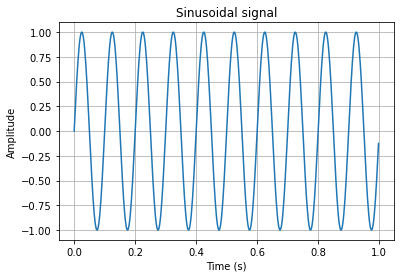

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 1, 500, endpoint=False)

# Frequency
f = 10

# Sinusoidal 
sine = np.sin(2 * np.pi * f * t)

# Plotting the sine
plt.plot(t, sine)
plt.title('Sinusoidal signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


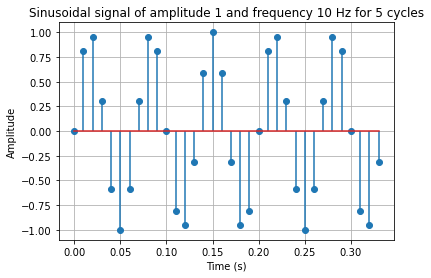

In [25]:
# Sampling frequency
fs = 100

# Time array for 5 cycles
t_new = np.arange(0, 5/f, 1/fs)

# Sinusoidal 
sine_new = np.sin(2 * np.pi * f * t_new)

# Plotting the sine
plt.stem(t_new, sine_new)
plt.title('Sinusoidal signal of amplitude 1 and frequency 10 Hz for 5 cycles')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


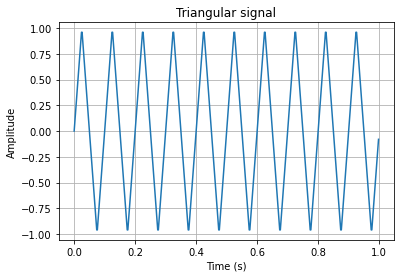

In [5]:
import scipy.signal as signal
triangular_signal = signal.sawtooth(2 * np.pi * f * t+np.pi/2, 0.5)
plt.plot(t, triangular_signal)
plt.title('Triangular signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

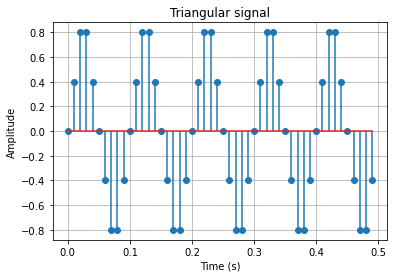

In [6]:
triangular_signal_sampled = signal.sawtooth(2 * np.pi * f * t_new+np.pi/2, 0.5)
plt.stem(t_new, triangular_signal_sampled)
plt.title(' Sampled Triangular signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [7]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Apply the filter to the signal.
sine_filtered = butter_lowpass_filter(sine_new, cutoff, fs, order)
triangular_signal_filtered= butter_lowpass_filter(triangular_signal_sampled, cutoff, fs, order)


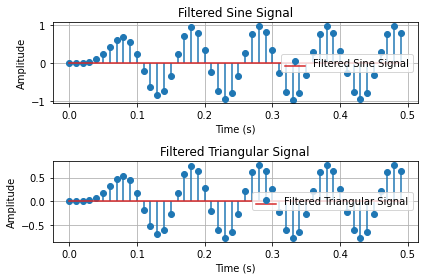

In [8]:
#  the filtered signals

plt.subplot(2, 1, 1)
plt.stem(t_new, sine_filtered, label='Filtered Sine Signal')
plt.title('Filtered Sine Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_new, triangular_signal_filtered, label='Filtered Triangular Signal')
plt.title('Filtered Triangular Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

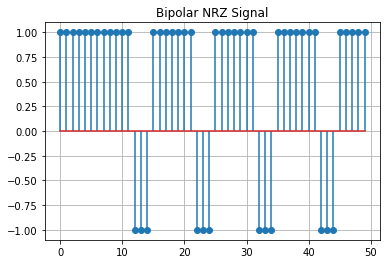

In [21]:
# Quantize the signal
quantized_sine = np.round(sine_filtered)

# Map the quantized values to bipolar NRZ levels
bipolar_nrz_sine = np.where(quantized_sine >= 0, 1, -1)

# Plot the bipolar NRZ signal
plt.stem(bipolar_nrz_sine)
plt.title('Bipolar NRZ Signal')
plt.grid(True)
plt.show()


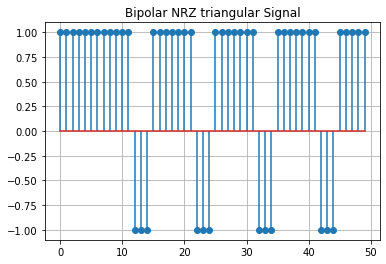

In [22]:
# Quantize the signal
quantized_triangular = np.round(triangular_signal_filtered)

# Map the quantized values to bipolar NRZ levels
bipolar_nrz_triangular = np.where(quantized_triangular >= 0, 1, -1)

# Plot the bipolar NRZ signal
plt.stem(bipolar_nrz_triangular)
plt.title('Bipolar NRZ triangular Signal')
plt.grid(True)
plt.show()

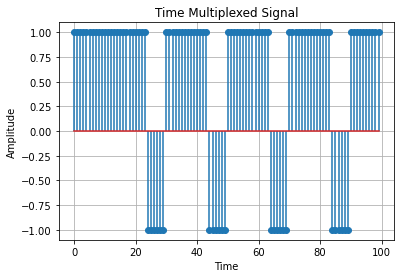

In [23]:

# Time multiplexing of the signals
time_multiplexed_signal = np.zeros((bipolar_nrz_sine.size + bipolar_nrz_triangular.size,), dtype=bipolar_nrz_sine.dtype)

time_multiplexed_signal[0::2] = bipolar_nrz_sine
time_multiplexed_signal[1::2] = bipolar_nrz_triangular

# Plotting the time multiplexed signal
plt.stem(time_multiplexed_signal)
plt.title('Time Multiplexed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


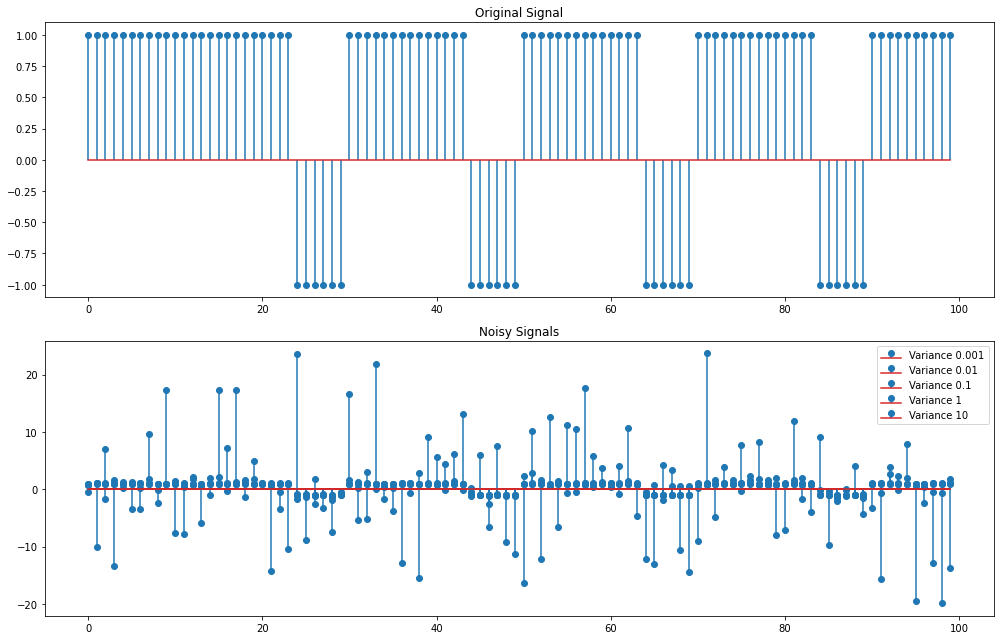

In [12]:
# Importing required function
from numpy.random import normal

# Define the function to add AWGN noise
def add_awgn_noise(signal, noise_variance):
    noise = normal(0, noise_variance, len(signal))
    return signal + noise

# Variance values
variances = [0.001, 0.01, 0.1, 1, 10]

# Add AWGN noise to the signal for each variance and store the results
noisy_signals = [add_awgn_noise(time_multiplexed_signal, variance) for variance in variances]

# Plot the original and noisy signals
plt.figure(figsize=(14, 9))

# Plot original signal
plt.subplot(2, 1, 1)
plt.stem(time_multiplexed_signal)
plt.title('Original Signal')

# Plot noisy signals
for i, noisy_signal in enumerate(noisy_signals):
    plt.subplot(2, 1, 2)
    plt.stem(noisy_signal, label=f'Variance {variances[i]}')
    plt.title('Noisy Signals')
    plt.legend()

plt.tight_layout()
plt.show()


In [13]:
def demultiplex_signal(noisy_signals, threshold):
    demultiplexed_signals = []
    for signal in noisy_signals:
        demultiplexed_signal = np.where(np.abs(signal) > threshold, 1, 0)
        demultiplexed_signals.append(demultiplexed_signal)
    return demultiplexed_signals


In [14]:
# Demultiplex the binary signals without noise
demultiplexed_signal = demultiplex_signal(time_multiplexed_signal, 0.5 )


# Demultiplex the binary signals with noise
demultiplexed_noisy_signal = demultiplex_signal(noisy_signal, 0.5)


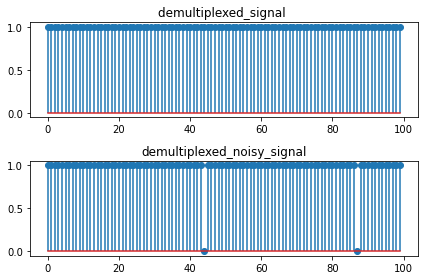

In [15]:

# Plotting the signals
plt.subplot(2, 1, 1)
plt.stem(demultiplexed_signal )
plt.title('demultiplexed_signal ')

plt.subplot(2, 1, 2)
plt.stem(demultiplexed_noisy_signal)
plt.title('demultiplexed_noisy_signal')

plt.tight_layout()
plt.show()


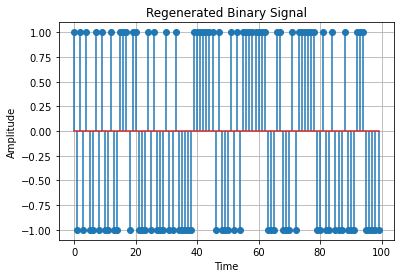

In [16]:
# Assuming that the noisy_signal is a binary signal with values close to 1 and -1
# We can regenerate the binary code by applying a threshold

import matplotlib.pyplot as plt

# Assuming that the noisy_signal is a binary signal with values close to 1 and -1
# We can regenerate the binary code by applying a threshold
binary_noisy_signal = [1 if value >= 0 else -1 for value in noisy_signal]

# Plotting the regenerated binary signal
plt.stem(binary_noisy_signal)
plt.title('Regenerated Binary Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
binary_noisy_signal = [1 if value >= 0 else -1 for value in noisy_signal]


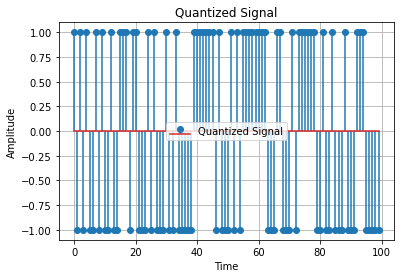

In [17]:
import matplotlib.pyplot as plt

# PCM demodulation system
def pcm_demodulation(signal):
    quantized_signal = []
    for i in signal:
        if i > 0:
            quantized_signal.append(1)
        else:
            quantized_signal.append(-1)
    return quantized_signal

# Apply the PCM demodulation system to the binary_noisy_signal
quantized_signal = pcm_demodulation(binary_noisy_signal)

# Plot the quantized signal
plt.stem(quantized_signal[:100], label='Quantized Signal')
plt.title('Quantized Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Reconstruct the signal using Low Pass Filter (LPF)
from scipy.signal import freqz

# Get the Nyquist frequency
nyq = 0.5 * fs

# Normalize the cutoff frequency by the Nyquist frequency
normal_cutoff = cutoff / nyq

# Get the filter coefficients 
b, a = butter_lowpass(normal_cutoff, fs, order=5)

# Apply the filter to the noisy signal
reconstructed_signal = lfilter(b, a, noisy_signal)


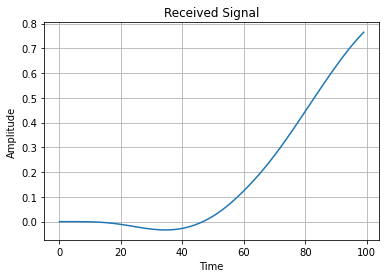

In [20]:
plt.plot(reconstructed_signal)
plt.title('Received Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
